__Objetivos__:

- Implementar as principais funções de ativação
- Entender intuitivamente como $w$ e $b$ influenciam nas funções de ativação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from ipywidgets import interactive, fixed

%matplotlib inline

In [2]:
def plot_interactive(w, b, func, ylim=fixed((0, 1)), show_der=False):
    plt.figure(0)
    
    x = np.linspace(-10, 10, num=1000)
    z = w*x + b
    y = func(z)
    
    plt.plot(x, y, color='blue')
    if show_der:
        der = func(z, derivative=True)
        y_der_z = der
        y_der_x = w*der
        plt.plot(x, y_der_z, color='red')
        plt.plot(x, y_der_x, color='green')
    plt.xlim(-10, 10)
    plt.ylim(ylim[0], ylim[1])
    plt.show()

# Linear

$$y=x$$

$$y^\prime = 1$$

In [3]:
def linear(x, derivative=False):
    return np.ones(x.shape[0]) if derivative else x

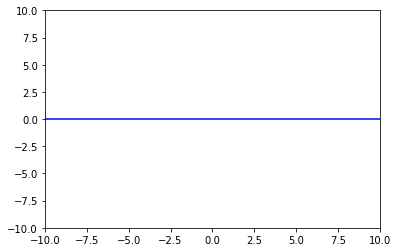

In [4]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(linear), ylim=fixed((-10, 10)))
interactive_plot

# Sigmoid 

$$y = \frac{1}{1+e^{-x}}$$

$$y^\prime = y(1-y)$$

In [5]:
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1-y)
    return 1.0/(1.0 + np.exp(-x))

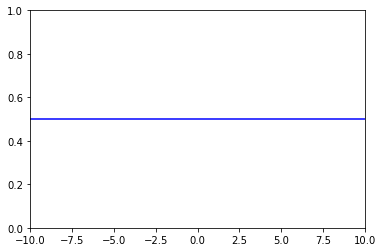

In [6]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(sigmoid))
interactive_plot

# Tanh

$$y = \frac{e^x - e^{-x}}{e^x+e^{-x}}$$

$$y^\prime = 1 - y^2$$

In [7]:
def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

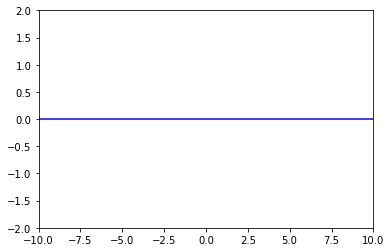

In [8]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(tanh), ylim=fixed((-2, 2)))
interactive_plot

# Gaussian

$$y = e^{-x^2}$$

$$y^\prime = -2xe^{-x^2}$$

In [9]:
def gaussian(x, derivative=False):
    if derivative:
        return -2*x*np.exp(-x**2)
    return np.exp(-x**2)

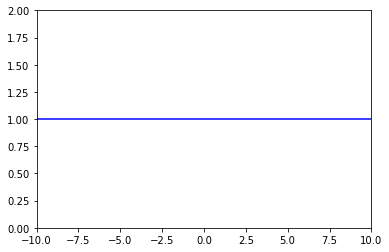

In [10]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(gaussian), ylim=fixed((0, 2)))
interactive_plot

# ReLU

$$y = max(0, x)$$

$$y^\prime = \begin{cases}0 &\ se\ x \leq 0\\1 &\ se\ x > 0\end{cases}$$

__Obs.__: Lembrando que a derivada da ReLU quando x = 0 não existe matematicamente, mas é convencionalmente definida como 0.

In [11]:
def relu(x, derivative=False):
    if derivative:
        x = np.where(x <= 0, 0, 1)
        return x
    return np.maximum(0, x)

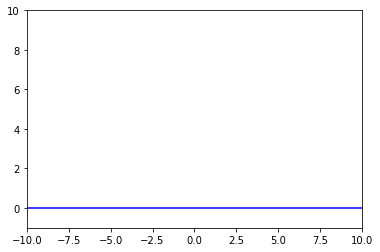

In [12]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(relu), ylim=fixed((-1, 10)))
interactive_plot

# Leaky ReLU 

$$y = \begin{cases}\alpha x & se\ x \leq 0\\1 & se\ x > 0\end{cases}$$

$$y^\prime = \begin{cases}\alpha &\ se\ x \leq 0\\1 &\ se\ x > 0\end{cases}$$

In [13]:
def leaky_relu(x, derivative=False):
    if derivative:
        x = np.where(x <= 0, 0.1, 1)
        return x
    x[x < 0] = 0.1*x[x < 0]
    return x

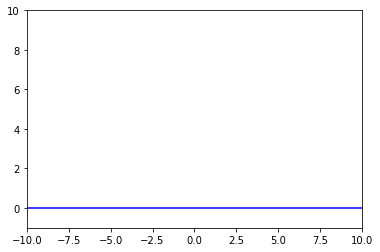

In [14]:
interactive_plot = interactive(plot_interactive, w=(-2.0, 2.0), b=(-3, 3, 0.5), func=fixed(leaky_relu), ylim=fixed((-1, 10)))
interactive_plot

# Tabela das Funções de Ativação

<img src="images/funcoes_de_ativacao.png" width=700>

# Referências

- [Tabela das funções de ativação](https://en.wikipedia.org/wiki/Activation_function)
- [Towards Data Science](https://medium.com/towards-data-science/activation-functions-neural-networks-1cbd9f8d91d6)
- [Stack Exchange](https://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons)